In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
%matplotlib inline

In [3]:
df =pd.read_csv('Salary_Data.csv')

In [4]:
df.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
YearsExperience    30 non-null float64
Salary             30 non-null float64
dtypes: float64(2)
memory usage: 560.0 bytes


In [6]:
df.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


In [7]:
df.columns

Index(['YearsExperience', 'Salary'], dtype='object')

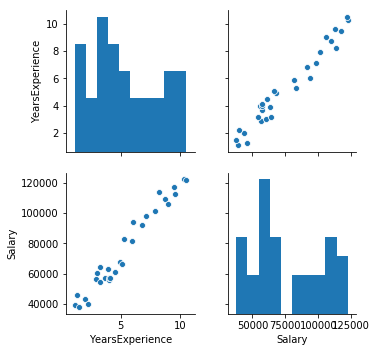

In [8]:
sns.pairplot(df)

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


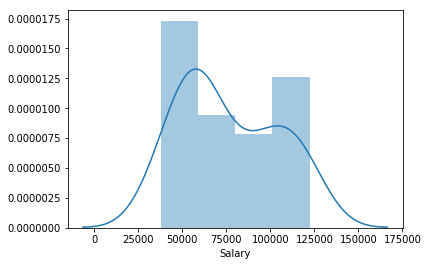

In [9]:
sns.distplot(df['Salary'])

In [10]:
df.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


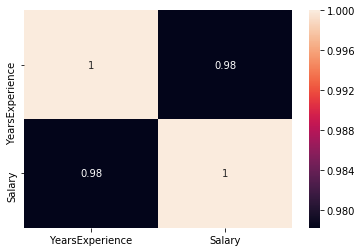

In [11]:
sns.heatmap(df.corr(),annot=True)

In [12]:
df.columns

Index(['YearsExperience', 'Salary'], dtype='object')

In [13]:
X=df[['YearsExperience']]

In [14]:
y=df['Salary']

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1/3, random_state=0)

In [17]:
from sklearn.linear_model import LinearRegression

In [18]:
lm=LinearRegression()

In [19]:
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [20]:
print(lm.intercept_)

26816.19224403119


In [21]:
lm.coef_

array([9345.94244312])

In [22]:
X_train.columns

Index(['YearsExperience'], dtype='object')

In [23]:
y_pred =lm.predict(X_test)

In [24]:
y_pred

array([ 40835.10590871, 123079.39940819,  65134.55626083,  63265.36777221,
       115602.64545369, 108125.8914992 , 116537.23969801,  64199.96201652,
        76349.68719258, 100649.1375447 ])

In [25]:
cdf =pd.DataFrame(lm.coef_,X.columns,columns=['coeff'])

In [26]:
cdf

,coeff
YearsExperience,9345.942443


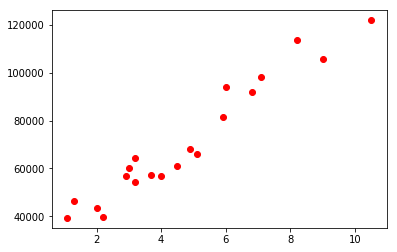

In [27]:
plt.scatter(X_train,y_train,color='red')

Text(0.5, 1.0, 'Salary vs experience')

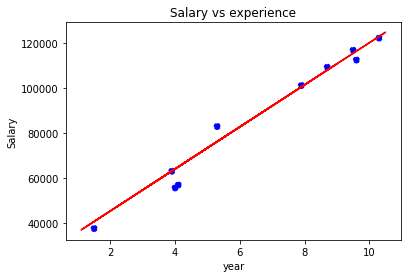

In [28]:
plt.scatter(X_test,y_test,color='blue',linestyle='--',marker='o')
plt.plot(X_train,lm.predict(X_train),color='red')
plt.xlabel('year')
plt.ylabel('Salary')
plt.title('Salary vs experience')